In [45]:
import heapq




In [46]:
# Define a class for nodes in A* search
class Node:
    def __init__(self, position, g_value, f_value, parent):
        self.position = position
        self.g_value = g_value
        self.f_value = f_value
        self.parent = parent

    def __lt__(self, other):
        # Compare nodes based on their f_value
        return self.f_value < other.f_value


In [47]:
# Define the A* algorithm
def astar(start, goal):
    # Heuristic function (Manhattan distance)
    def heuristic(node, goal):
        return abs(node[0] - goal[0]) + abs(node[1] - goal[1])

    # Priority queue for open nodes
    open_nodes = []

    # Cost dictionary for g-values
    g_values = {}

    # Parent dictionary for path reconstruction
    parents = {}

    # Create the start node
    start_node = Node(start, 0, heuristic(start, goal), None)
    heapq.heappush(open_nodes, (start_node.f_value, start_node))
    g_values[start] = 0

    # A* algorithm
    while open_nodes:
        _, current_node = heapq.heappop(open_nodes)

        if current_node.position == goal:
            path = []
            while current_node:
                path.append(current_node.position)
                current_node = current_node.parent
            return list(reversed(path))

        dx = [0, -1, 0, 1]
        dy = [-1, 0, 1, 0]

        for i in range(4):
            x = current_node.position[0] + dx[i]
            y = current_node.position[1] + dy[i]
            next_node = (x, y)

            if 0 < x <= n and 0 < y <= m and next_node not in obstacles:
                new_cost = current_node.g_value + 1

                if next_node not in g_values or new_cost < g_values[next_node]:
                    g_values[next_node] = new_cost
                    f_value = new_cost + heuristic(next_node, goal)
                    next_node_obj = Node(next_node, new_cost, f_value, current_node)
                    heapq.heappush(open_nodes, (next_node_obj.f_value, next_node_obj))
                    parents[next_node] = next_node_obj

    return []

In [48]:
# Define the path_find algorithm
def path_find(n, m, k, R, P, E, D):
    paths = []

    for i in range(k):
        start = R[i]
        goal_pickup = P[i]
        goal_delivery = E[i]
        goal_final = D[i]
        path_pickup = astar(start, goal_pickup)
        path_delivery = astar(goal_pickup, goal_delivery)
        path_final = astar(goal_delivery, goal_final)

        # Ensure that each robot travels, even if the path is suboptimal
        combined_path = path_pickup + path_delivery + path_final
        paths.append(combined_path)

    return paths




In [49]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

In [50]:
def plot_robot_coordinates(grid, work_schedule_paths):
    # Create a colormap for robot paths with unique colors
    colors = cm.rainbow(np.linspace(0, 1, k))

    # Plot the grid
    fig, ax = plt.subplots(figsize=(10, 5))
    for i in range(n):
        for j in range(m):
            cell = grid[i][j]
            if cell == 'X':
                ax.add_patch(plt.Rectangle((j, n - i - 1), 1, 1, color='black'))
            elif cell != ' ':
                plt.text(j + 0.5, n - i - 0.5, cell, ha='center', va='center', fontsize=12, color='white')

    # Plot the coordinates followed by each robot with different colors
    for i, path in enumerate(work_schedule_paths):
        if path:
            x_coords, y_coords = zip(*path)
            color = colors[i]  # Use a unique color for each robot
            plt.plot(y_coords, [n - x - 1 for x in x_coords], label=f"Robot {i + 1}", color=color, linewidth=2)

    plt.xlim(0, m)
    plt.ylim(0, n)
    ax.invert_yaxis()
    plt.grid(True, color='gray')
    plt.legend()

    # Show the plot
    plt.show()

##Text case 1


Solution found with total cost: 29
Robot 1 path: [(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (2, 6), (2, 7), (2, 8), (2, 9), (2, 10), (2, 11), (2, 12), (2, 13), (2, 13), (2, 14), (2, 15), (3, 15), (4, 15), (4, 16), (4, 16), (4, 15), (4, 14), (4, 13)]
Robot 2 path: [(6, 10), (6, 9), (6, 8), (6, 7), (6, 6), (6, 5), (5, 5), (5, 4), (5, 3), (5, 2), (6, 2), (6, 1), (6, 1), (5, 1), (4, 1), (3, 1), (2, 1), (2, 2), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 9), (1, 10), (1, 11)]
Robot 3 path: [(2, 8), (2, 7), (3, 7), (4, 7), (5, 7), (5, 7), (5, 6), (6, 6), (6, 5), (6, 5), (5, 5), (4, 5), (4, 6), (3, 6), (2, 6), (1, 6)]


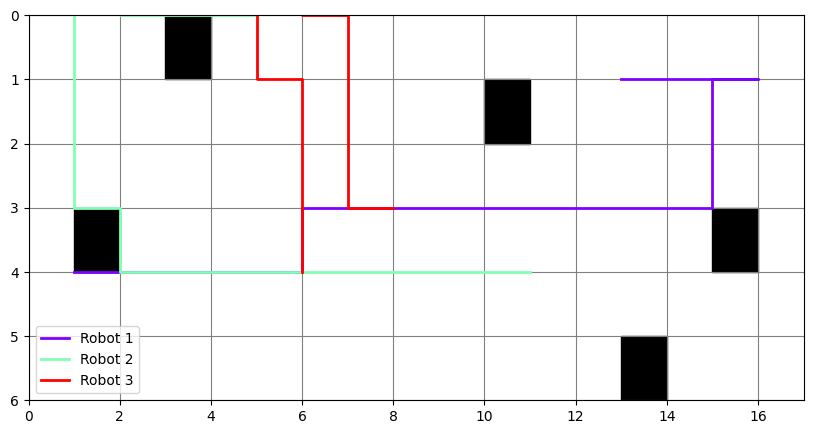

In [51]:
# Define the grid dimensions
n = 6  # Number of rows in the grid
m = 17  # Number of columns in the grid
k = 3  # Number of robots

# Define the robot starting locations
R = [(1, 1), (6, 10), (2, 8)]

# Define the component pick-up locations
P = [(2, 13), (6, 1), (5, 7)]

# Define the destination cell locations
E = [(4, 16), (1,9), (6, 5)]

# Define the final cell locations
D = [(4, 13), (1, 11), (1, 6)]

# Define the grid obstacles
obstacles = {(3, 2), (6, 4), (5, 11), (1, 14), (3, 16)}

# Call the path_find algorithm to get the work schedule paths
work_schedule_paths = path_find(n, m, k, R, P, E, D)
cost = max(len(path) for path in work_schedule_paths)
print("Solution found with total cost:", cost)

# Print the work schedule paths for each robot/task
for i, path in enumerate(work_schedule_paths):
    if path:
        print(f"Robot {i + 1} path:", path)
    else:
        print(f"Robot {i + 1} has no valid path assigned")

grid = [[' ' for _ in range(m)] for _ in range(n)]

# Plot the obstacles on the grid
for obstacle in obstacles:
    x, y = obstacle
    grid[x - 1][y - 1] = 'X'

# Call the function to plot the coordinates
plot_robot_coordinates(grid, work_schedule_paths)

## Test case 2

Solution found with total cost: 29
Robot 1 path: [(1, 1), (1, 2), (1, 3), (1, 4), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (2, 10), (2, 11), (2, 12), (2, 13), (2, 14), (2, 15), (2, 15), (3, 15), (4, 15), (4, 16), (4, 16), (4, 15), (4, 14), (4, 13)]
Robot 2 path: [(6, 10), (6, 9), (6, 8), (6, 7), (6, 6), (6, 5), (5, 5), (5, 4), (5, 3), (5, 2), (6, 2), (6, 1), (6, 1), (5, 1), (4, 1), (4, 2), (4, 3), (4, 4), (3, 4), (3, 5), (3, 6), (3, 7), (2, 7), (1, 7), (1, 8), (1, 9), (1, 9), (1, 10), (1, 11)]
Robot 3 path: [(2, 8), (2, 7), (3, 7), (4, 7), (5, 7), (5, 7), (5, 6), (6, 6), (6, 5), (6, 5), (5, 5), (4, 5), (4, 6), (3, 6)]


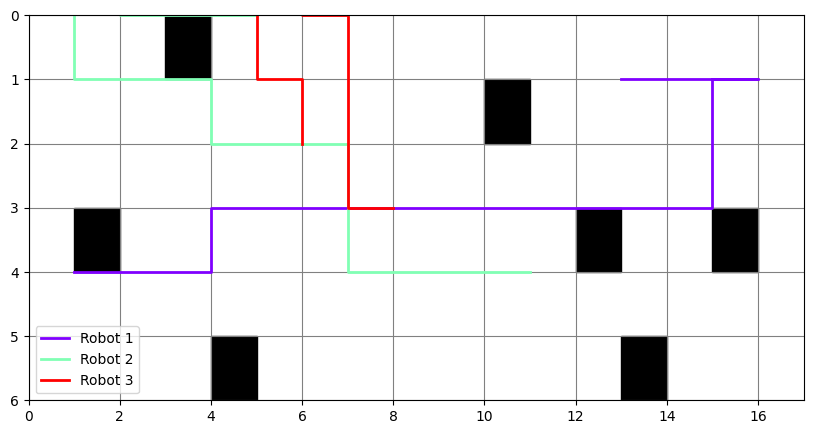

In [52]:
# Define the grid dimensions
n = 6  # Number of rows in the grid
m = 17  # Number of columns in the grid
k = 3  # Number of robots

# Define the robot starting locations
R = [(1, 1), (6, 10), (2, 8)]

# Define the component pick-up locations
P = [(2, 15), (6, 1), (5, 7)]

# Define the destination cell locations
E = [(4, 16), (1,9), (6, 5)]

# Define the final cell locations
D = [(4, 13), (1, 11), (3, 6)]

# Define the grid obstacles
obstacles = {(3, 2), (6, 4), (5, 11), (1, 14), (3, 16),(1,5),(3,13)}

# Call the path_find algorithm to get the work schedule paths
work_schedule_paths = path_find(n, m, k, R, P, E, D)
cost = max(len(path) for path in work_schedule_paths)
print("Solution found with total cost:", cost)

# Print the work schedule paths for each robot/task
for i, path in enumerate(work_schedule_paths):
    if path:
        print(f"Robot {i + 1} path:", path)
    else:
        print(f"Robot {i + 1} has no valid path assigned")

grid = [[' ' for _ in range(m)] for _ in range(n)]

# Plot the obstacles on the grid
for obstacle in obstacles:
    x, y = obstacle
    grid[x - 1][y - 1] = 'X'

# Call the function to plot the coordinates
plot_robot_coordinates(grid, work_schedule_paths)

## Test case 3

Solution found with total cost: 27
Robot 1 path: [(1, 1), (1, 2), (1, 3), (1, 4), (2, 4), (2, 5), (3, 5), (3, 6), (4, 6), (4, 7), (4, 8), (4, 9), (4, 10), (4, 11), (4, 12), (4, 13), (4, 14), (4, 15), (4, 15), (4, 16), (4, 16), (4, 15), (4, 14), (4, 13)]
Robot 2 path: [(6, 10), (6, 9), (6, 8), (6, 7), (5, 7), (5, 7), (5, 8), (6, 8), (6, 9), (6, 10), (6, 11), (6, 12), (6, 13), (6, 14), (6, 15), (6, 16), (6, 16), (6, 15), (6, 14), (5, 14), (4, 14), (3, 14), (2, 14), (2, 13), (1, 13), (1, 12), (1, 11)]
Robot 3 path: [(2, 8), (2, 7), (2, 6), (2, 5), (2, 4), (2, 3), (2, 2), (2, 1), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (1, 6), (1, 7), (1, 8), (1, 9), (1, 9), (1, 8), (1, 7), (2, 7), (2, 6), (3, 6)]


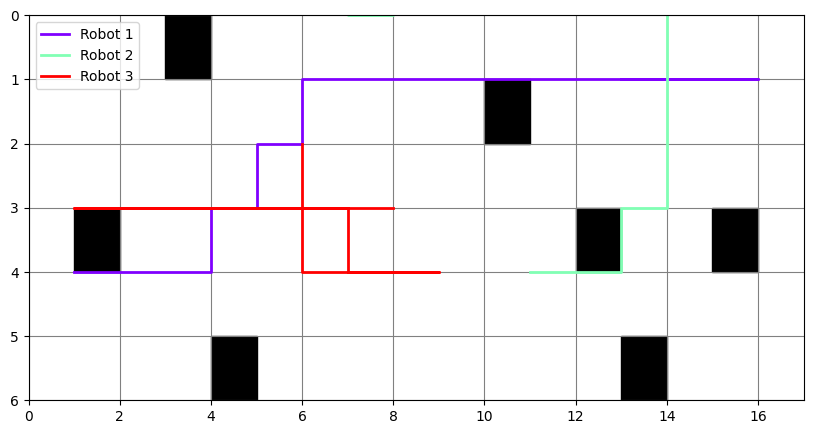

In [53]:
# Define the grid dimensions
n = 6  # Number of rows in the grid
m = 17  # Number of columns in the grid
k = 3  # Number of robots

# Define the robot starting locations
R = [(1, 1), (6, 10), (2, 8)]

# Define the component pick-up locations
P = [(4, 15), (5, 7), (2, 1)]

# Define the destination cell locations
E = [(4, 16), (6,16), (1, 9)]

# Define the final cell locations
D = [(4, 13), (1, 11), (3, 6)]

# Define the grid obstacles
obstacles = {(3, 2), (6, 4), (5, 11), (1, 14), (3, 16),(1,5),(3,13)}

# Call the path_find algorithm to get the work schedule paths
work_schedule_paths = path_find(n, m, k, R, P, E, D)
cost = max(len(path) for path in work_schedule_paths)
print("Solution found with total cost:", cost)

# Print the work schedule paths for each robot/task
for i, path in enumerate(work_schedule_paths):
    if path:
        print(f"Robot {i + 1} path:", path)
    else:
        print(f"Robot {i + 1} has no valid path assigned")


grid = [[' ' for _ in range(m)] for _ in range(n)]

# Plot the obstacles on the grid
for obstacle in obstacles:
    x, y = obstacle
    grid[x - 1][y - 1] = 'X'

# Call the function to plot the coordinates
plot_robot_coordinates(grid, work_schedule_paths)